# Rainfall Prediction - Weather Forecasting
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

## 1. Problem Statement:
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:
Number of columns: 23

## Date - The date of observation

Location -The common name of the location of the weather station

MinTemp -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall -The amount of rainfall recorded for the day in mm

Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read Dataset

In [3]:
DF = pd.read_csv('weatherAUS.csv')
DF

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Exploratory Data Analysis (EDA)

In [4]:
DF.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

We have these columns in the dataset. As we have to predict the rainfall for toromorrow and the amount of rainall we will see the co relation of all the features with these two targers and see if all the features are related.

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
DF.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

We identified that the Target Variable 'Rain Tomorrow' has 2 classes making it a Classification problem while predicting tomorrows rainfall. The other target Rainfall is a continuous data making it a regression problem.

In [7]:
DF.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

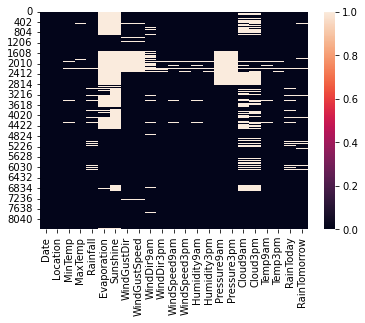

In [8]:
sns.heatmap(DF.isnull());

We can clearly see from the dataset that apart from the date and location we have null values in almost all of the features and also the target values.

In [9]:
for i in DF.columns:
    print(f'_____________________{i}_________________________\n')
    print(DF[i].value_counts(),'\n')

_____________________Date_________________________

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64 

_____________________Location_________________________

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64 

_____________________MinTemp_________________________

 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64 

_____________________MaxTemp_________________________

19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9    

From the value counts we can see that the target variable rain tomorrow is imbalanced, will use SMOTE later

### Feature Engineering and Data Cleaning

In [10]:
DF['Date'] = pd.to_datetime(DF['Date'])

In [11]:
DF.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [12]:
DF['Day'] = pd.to_datetime(DF.Date,format='%d/%m/%Y').dt.day
DF['Month'] = pd.to_datetime(DF.Date,format='%d/%m/%Y').dt.month
DF['Year'] = pd.to_datetime(DF.Date,format='%d/%m/%Y').dt.year
DF.drop(columns = ['Date'],axis=1,inplace=True)

In [13]:
DF.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


### Treating the Null Values

In [14]:
# Filling null values in MinTemp with it's mean
DF['MinTemp'] = DF['MinTemp'].fillna(DF['MinTemp'].mean())

# Filling null values in MaxTemp with it's mean
DF['MaxTemp'] = DF['MaxTemp'].fillna(DF['MaxTemp'].mean())

# Filling null values in Rainfall with it's mode
DF['Rainfall'] = DF['Rainfall'].fillna(DF['Rainfall'].mode()[0])

#Filling null values in Evaporation with it's mean
DF['Evaporation'] = DF['Evaporation'].fillna(DF['Evaporation'].mean())

#Filling null values in Sunshine with it's mean
DF['Sunshine'] = DF['Sunshine'].fillna(DF['Sunshine'].mean())

#Filling null values in WindGustDir with it's mode
DF['WindGustDir'] = DF['WindGustDir'].fillna(DF['WindGustDir'].mode()[0])

#Filling null values in WindGustSpeed with it's mean
DF['WindGustSpeed'] = DF['WindGustSpeed'].fillna(DF['WindGustSpeed'].mean())

#Filling null values in WindDir9am with it's mode
DF['WindDir9am'] = DF['WindDir9am'].fillna(DF['WindDir9am'].mode()[0])

#Filling null values in WindDir3pm with it's mode
DF['WindDir3pm'] = DF['WindDir3pm'].fillna(DF['WindDir3pm'].mode()[0])

#Filling null values in WindSpeed9am with it's mean
DF['WindSpeed9am'] = DF['WindSpeed9am'].fillna(DF['WindSpeed9am'].mean())

#Filling null values in WindSpeed3pm with it's mean
DF['WindSpeed3pm'] = DF['WindSpeed3pm'].fillna(DF['WindSpeed3pm'].mean())

#Filling null values in Humidity9am with it's mean
DF['Humidity9am'] = DF['Humidity9am'].fillna(DF['Humidity9am'].mean())

#Filling null values in Humidity3pm with it's mean
DF['Humidity3pm'] = DF['Humidity3pm'].fillna(DF['Humidity3pm'].mean())

#Filling null values in Pressure9am with it's mean
DF['Pressure9am'] = DF['Pressure9am'].fillna(DF['Pressure9am'].mean())

#Filling null values in Pressure3pm with it's mean
DF['Pressure3pm'] = DF['Pressure3pm'].fillna(DF['Pressure3pm'].mean())

#Filling null values in Cloud9am with it's mean
DF['Cloud9am'] = DF['Cloud9am'].fillna(DF['Cloud9am'].mean())

#Filling null values in Cloud3pm with it's mean
DF['Cloud3pm'] = DF['Cloud3pm'].fillna(DF['Cloud3pm'].mean())

#Filling null values in Temp9am with it's mean
DF['Temp9am'] = DF['Temp9am'].fillna(DF['Temp9am'].mean())

#Filling null values in Temp3pm with it's mean
DF['Temp3pm'] = DF['Temp3pm'].fillna(DF['Temp3pm'].mean())

#Filling null values in Temp3pm with it's mean
DF['Temp3pm'] = DF['Temp3pm'].fillna(DF['Temp3pm'].mean())

#Filling null values in RainToday with it's mode
DF['RainToday'] = DF['RainToday'].fillna(DF['RainToday'].mode()[0])

#Filling null values in RainTomorrow with it's mode
DF['RainTomorrow'] = DF['RainTomorrow'].fillna(DF['RainTomorrow'].mode()[0])

In [15]:
DF.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

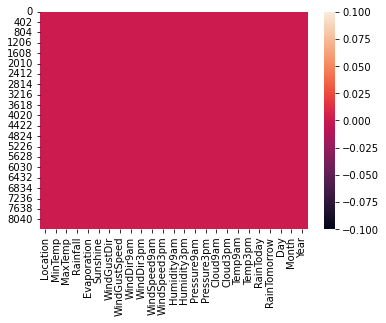

In [16]:
sns.heatmap(DF.isnull());

We have successfully treated the Null Value

### Statistical

In [17]:
DF.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.725982,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.741958,6.442136,2012.102433
std,5.379488,6.114516,10.319872,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,0.800000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

### Visualization

In [18]:
cat_col = []
num_col = []

for i in DF.dtypes.index:
    if DF.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
        
        
print('Categorical Columns \n',cat_col)
print('Numerical Columns \n',num_col)

Categorical Columns 
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical Columns 
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


#### categorical columns

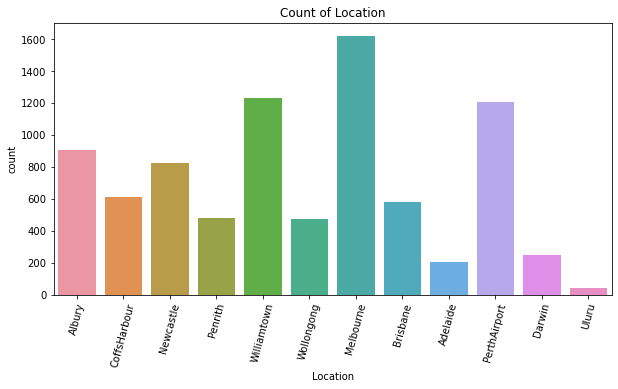

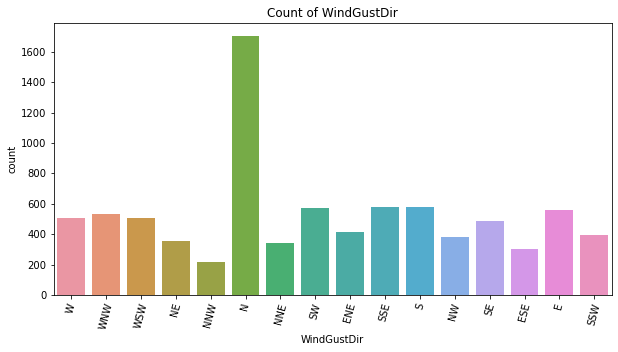

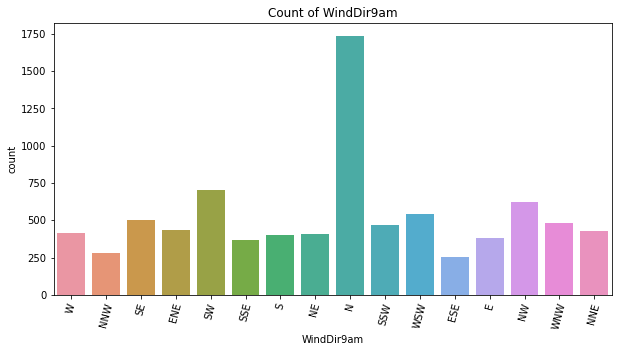

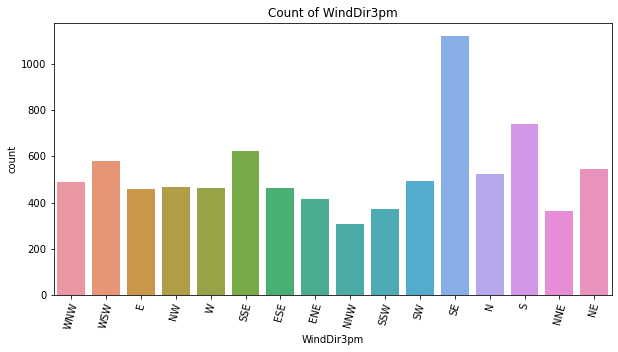

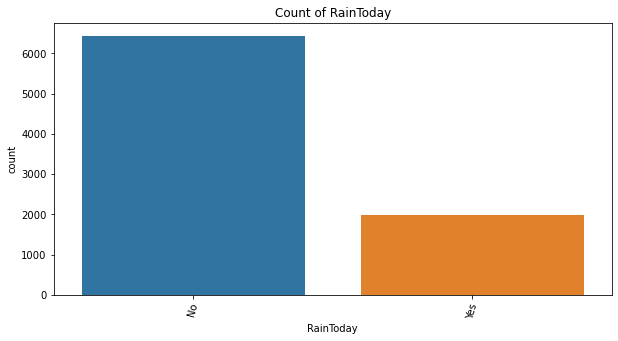

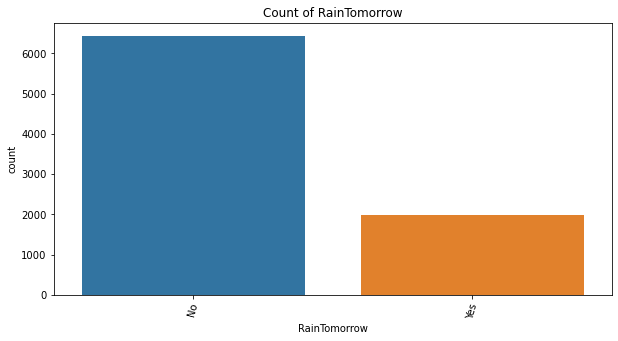

In [19]:
for i in cat_col:
    plt.figure(figsize=(10,5))
    sns.countplot(DF[i])
    plt.title(f'Count of {i}')
    plt.xticks(rotation=75)
    plt.show()

#### numerical columns

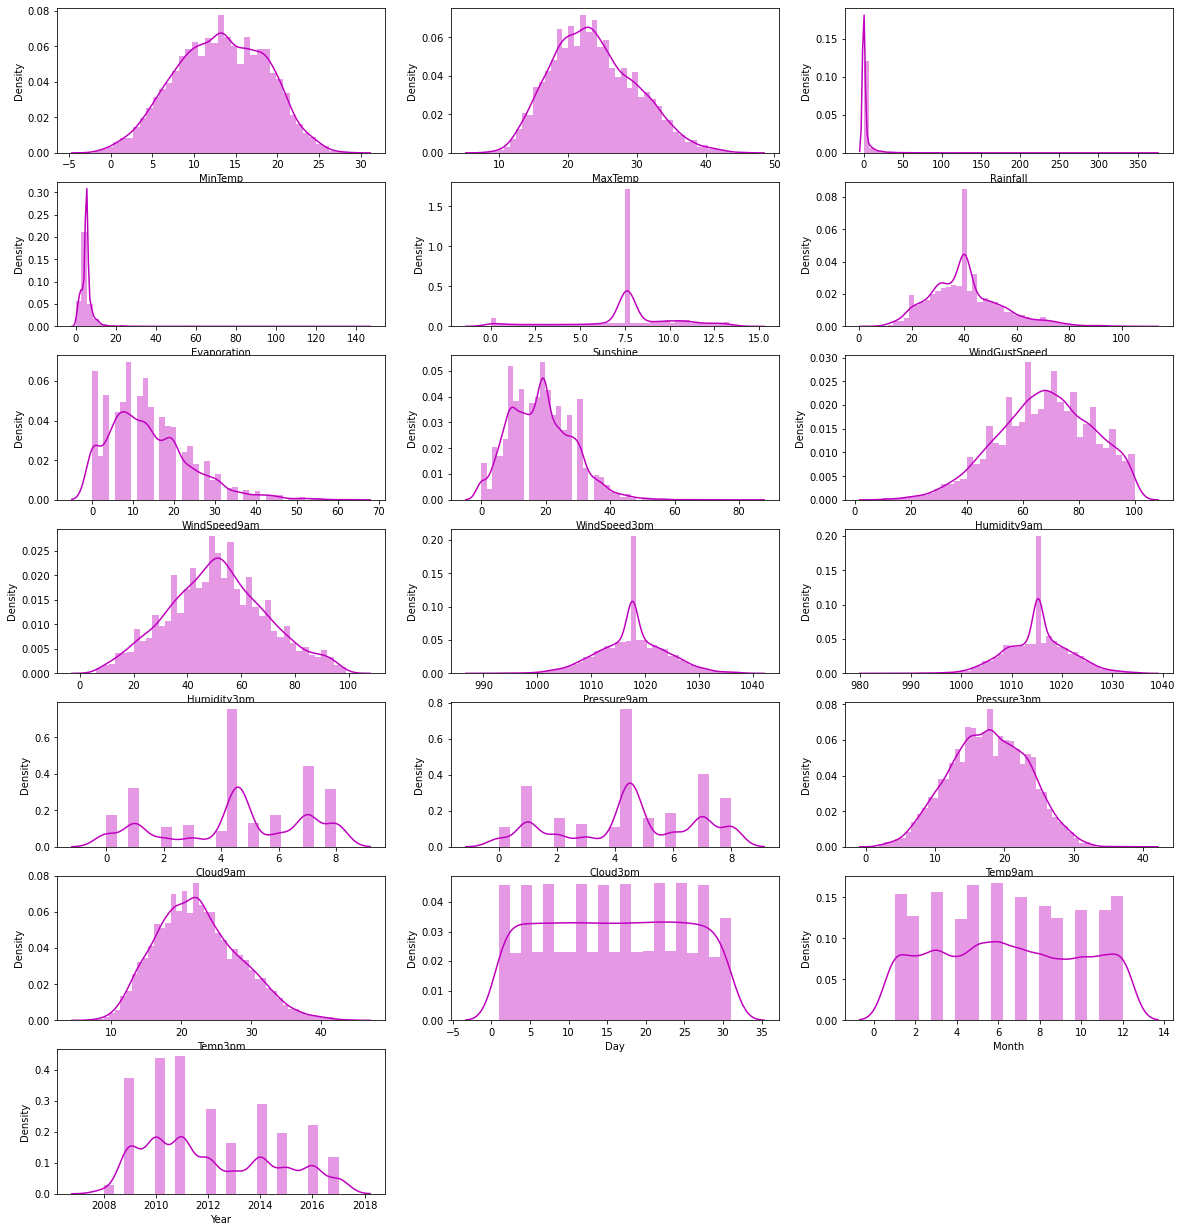

In [20]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(DF[column],color='m')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1;

From the graphs we can say that the dataset is not normally distributed.

Min Temp is normally distributed

Max Temp is slightly skewed right

Rainfall is skewed right

Evaporation is skewed right

Sunshine is not normally distributed

WindGustSpeed, WindSpeed9am,WindSpeed3pm is skewed right

Humidity9am is slightly skewed left and Humidity3pm is normally distributed.

Pressure9am, Pressure3pm, Cloud9am, Cloud3pm,Temp9am,Temp3pm,Day, Month and Year has no skewness however the data is not distributed normally

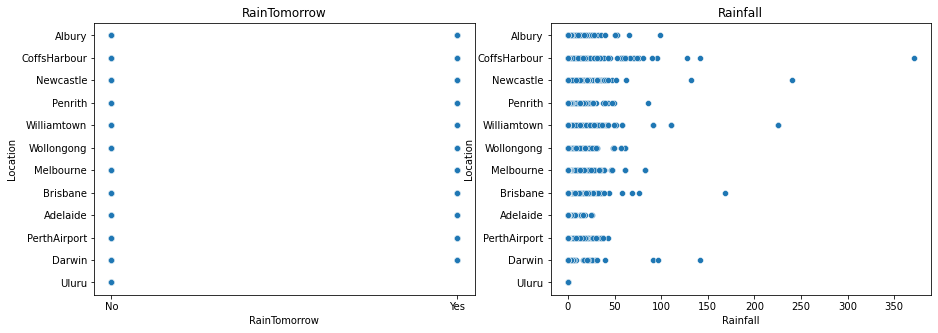

In [21]:
#checking the corelation between location with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=DF)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=DF)
plt.show()

We can see that location does not have any kmajot impact on the prediction of rainfall, however we will not drop the feature as prediction is done as per reigion.

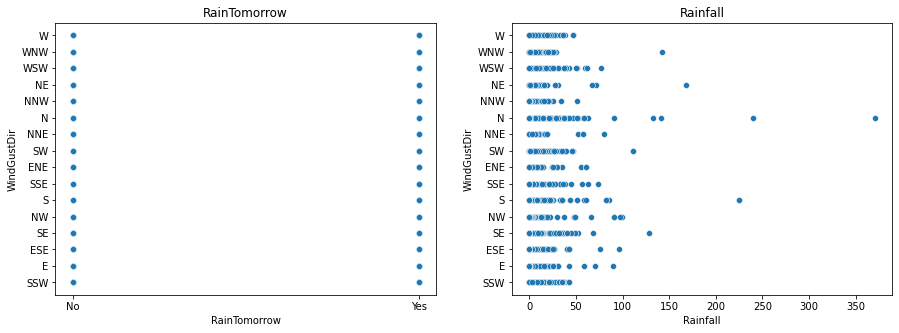

In [22]:
#checking the corelation between WindGustDir with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=DF)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=DF)
plt.show()

There is no linear relation of the feature with both the targets

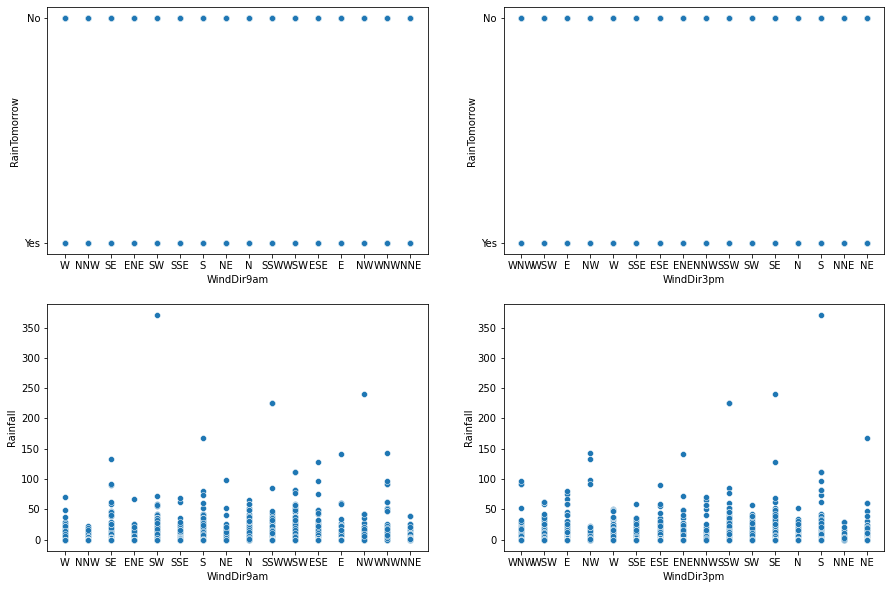

In [23]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=DF)

#checking the relation between WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=DF)

#checking the relation between WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=DF)

#checking the relation between WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=DF);


We do not see any linear relation here

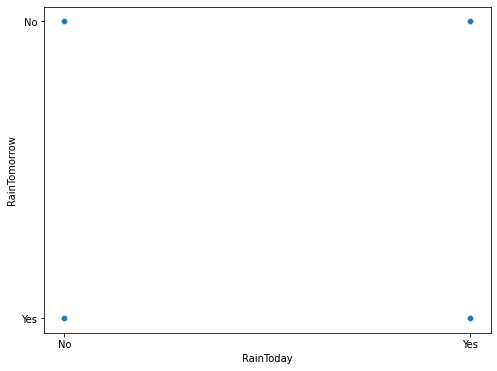

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=DF['RainToday'],y=DF['RainTomorrow']);

there is no relation between Rain Today and Rain Tomorrow

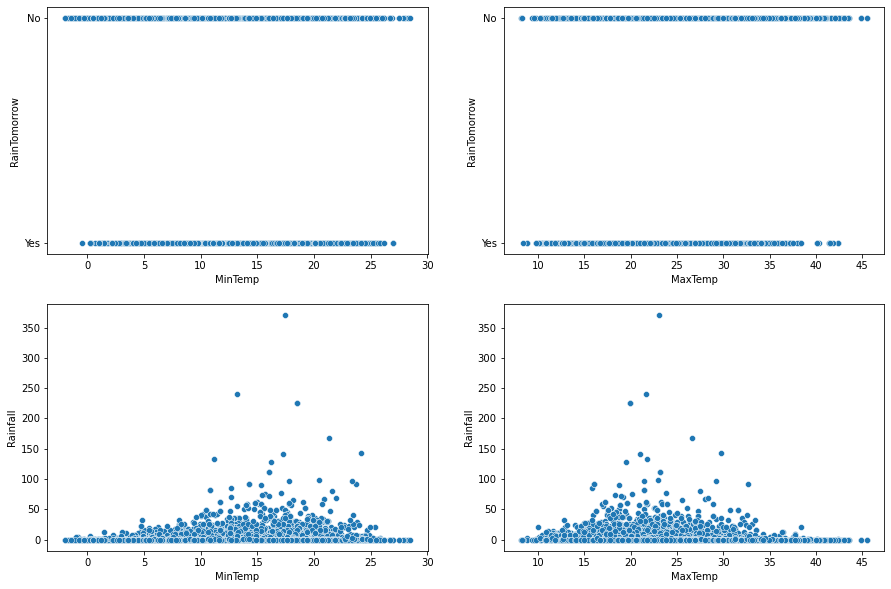

In [25]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between minimum temperature and RainTomorrow
sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],palette="green",data=DF)

#checking the relation between max temperature and RainTomorrow
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=DF)

#checking the relation between minimum temperature and Rainfall
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],palette="OrRd",data=DF)

#checking the relation between max temperature and Rainfall
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],palette="OrRd",data=DF);

(<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>,)

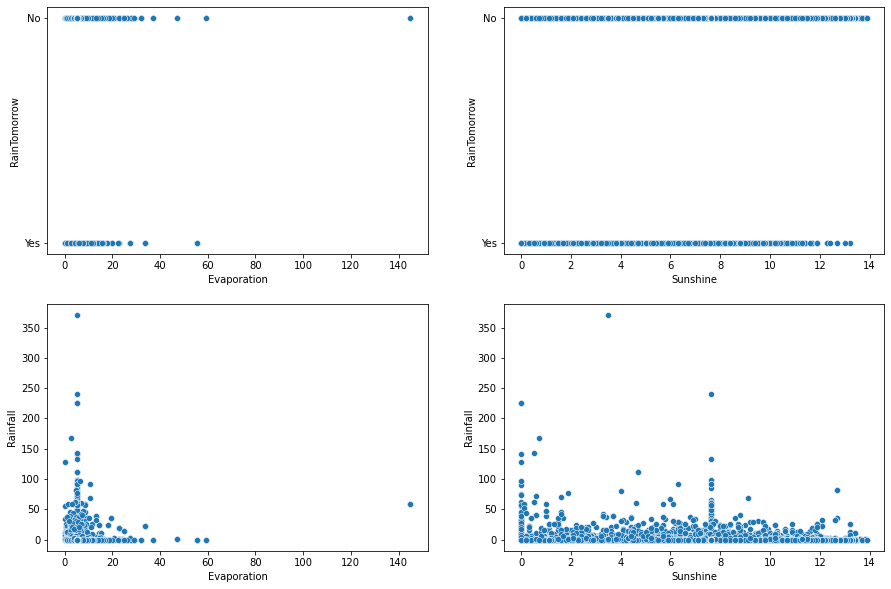

In [26]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.scatterplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=DF)

#checking the relation between Sunshine and RainTomorrow
sns.scatterplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=DF)

#checking the relation between Evaporation and Rainfall
sns.scatterplot(x='Evaporation',y='Rainfall',ax=axes[1,0],palette="OrRd",data=DF)

#checking the relation between Sunshine and Rainfall
sns.scatterplot(x='Sunshine',y='Rainfall',ax=axes[1,1],palette="OrRd",data=DF),

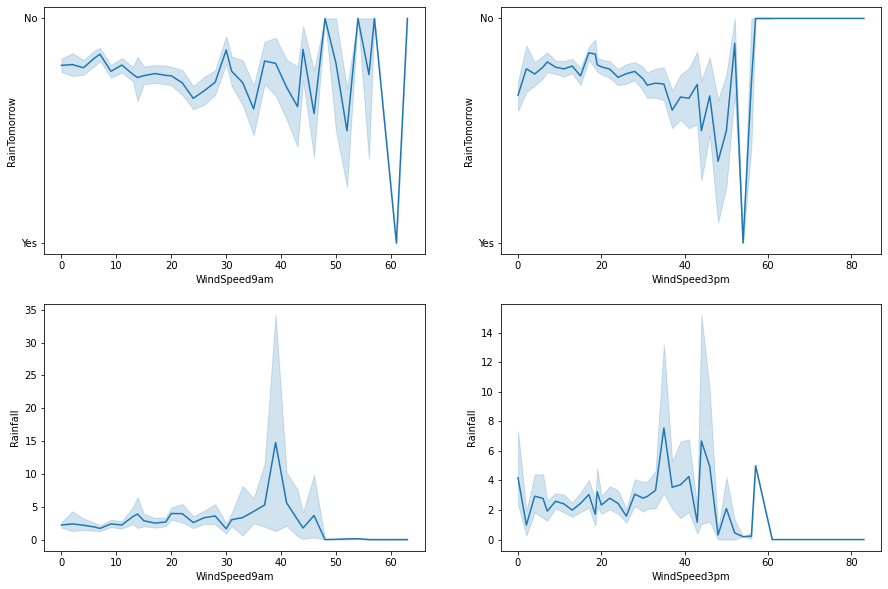

In [27]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindSpeed9am and RainTomorrow
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=DF)

#checking the relation between WindSpeed3pm and RainTomorrow
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=DF)

#checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=DF)

#checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=DF);

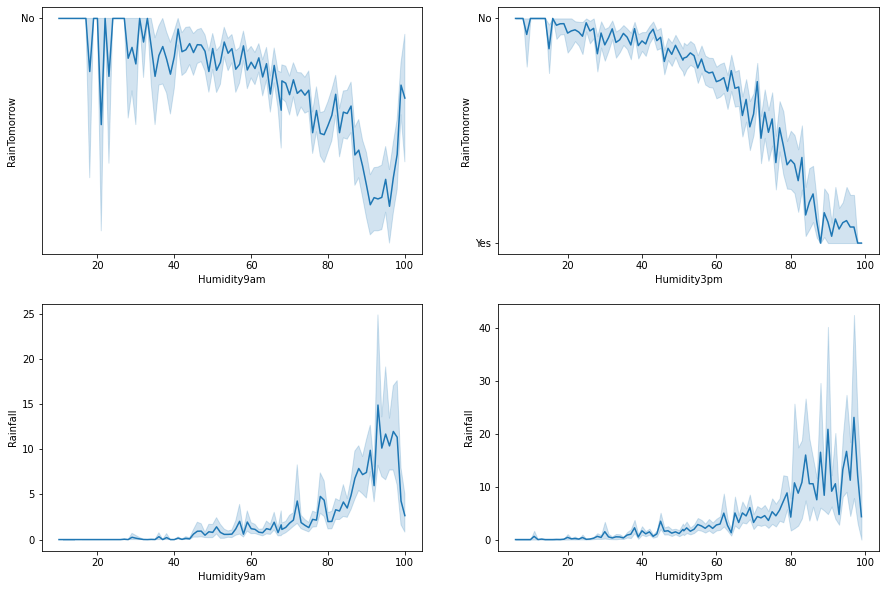

In [28]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=DF)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=DF)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=DF)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=DF);

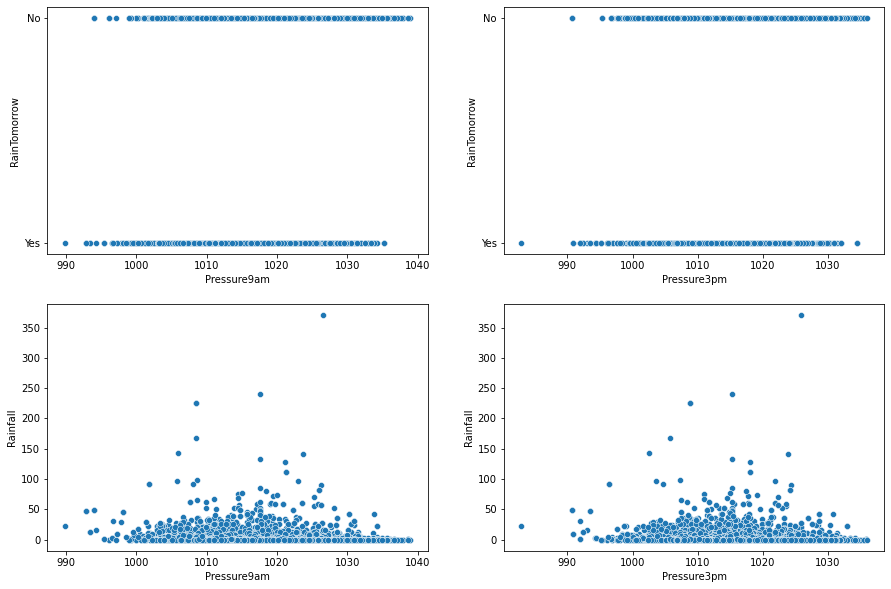

In [29]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Pressure9am and RainTomorrow
sns.scatterplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=DF)

#checking the relation between Pressure3pm and RainTomorrow
sns.scatterplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=DF)

#checking the relation between Pressure9am and Rainfall
sns.scatterplot(x='Pressure9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=DF)

#checking the relation between Pressure3pm and Rainfall
sns.scatterplot(x='Pressure3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=DF);

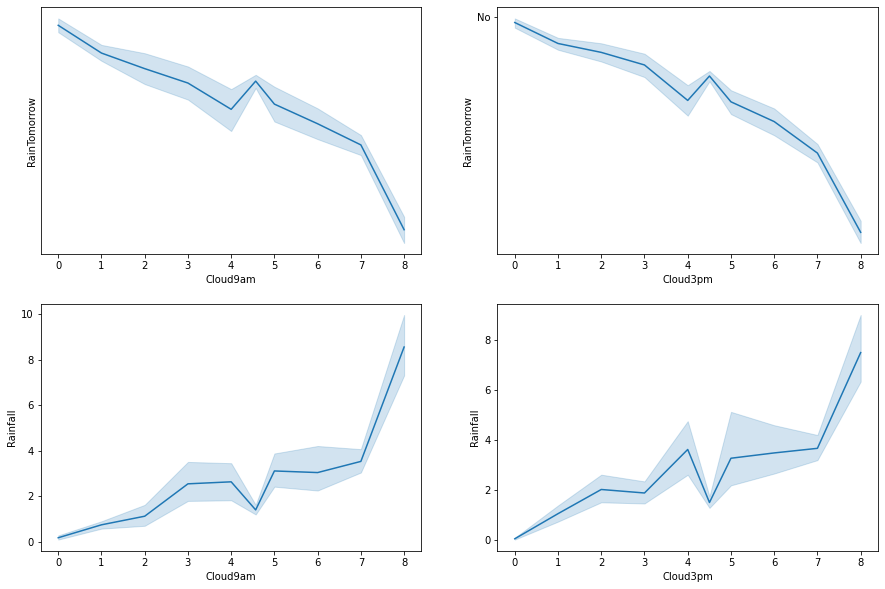

In [30]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=DF)

#checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=DF)

#checking the relation between Cloud9am and Rainfall
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=DF)

#checking the relation between Cloud3pm and Rainfall
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=DF);

The graph shows a linear relationship, and inverse relation between could and rain tomorrow and a positive relation between could and rainfall.

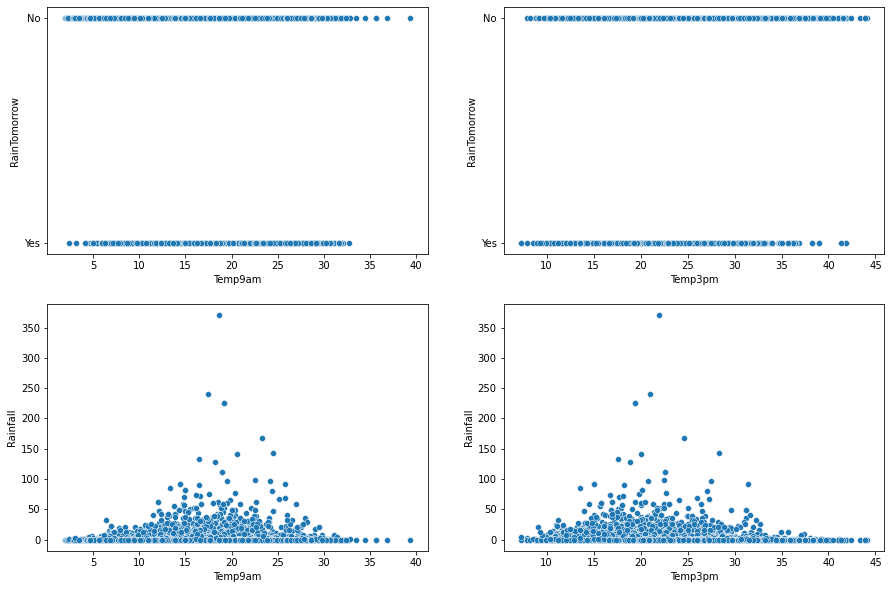

In [31]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Temp9am and RainTomorrow
sns.scatterplot(x='Temp9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=DF)

#checking the relation between Temp3pm and RainTomorrow
sns.scatterplot(x='Temp3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=DF)

#checking the relation between Temp9am and Rainfall
sns.scatterplot(x='Temp9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=DF)

#checking the relation between Temp3pm and Rainfall
sns.scatterplot(x='Temp3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=DF);

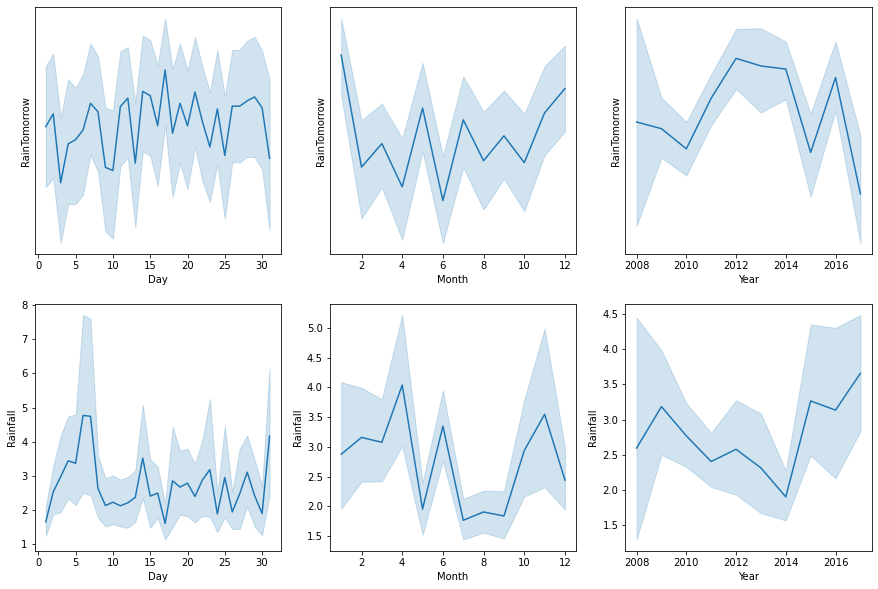

In [32]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

#checking the relation between Day and RainTomorrow
sns.lineplot(x='Day',y='RainTomorrow',ax=axes[0,0],palette="green",data=DF)

#checking the relation between Month and RainTomorrow
sns.lineplot(x='Month',y='RainTomorrow',ax=axes[0,1],palette="green",data=DF)

#checking the relation between Year and RainTomorrow
sns.lineplot(x='Year',y='RainTomorrow',ax=axes[0,2],palette="green",data=DF)

#checking the relation between Day and Rainfall
sns.lineplot(x='Day',y='Rainfall',ax=axes[1,0],palette="purple",data=DF)

#checking the relation between Month and Rainfall
sns.lineplot(x='Month',y='Rainfall',ax=axes[1,1],palette="purple",data=DF)

#checking the relation between Year and Rainfall
sns.lineplot(x='Year',y='Rainfall',ax=axes[1,2],palette="purple",data=DF);

### Identifying the Outliers

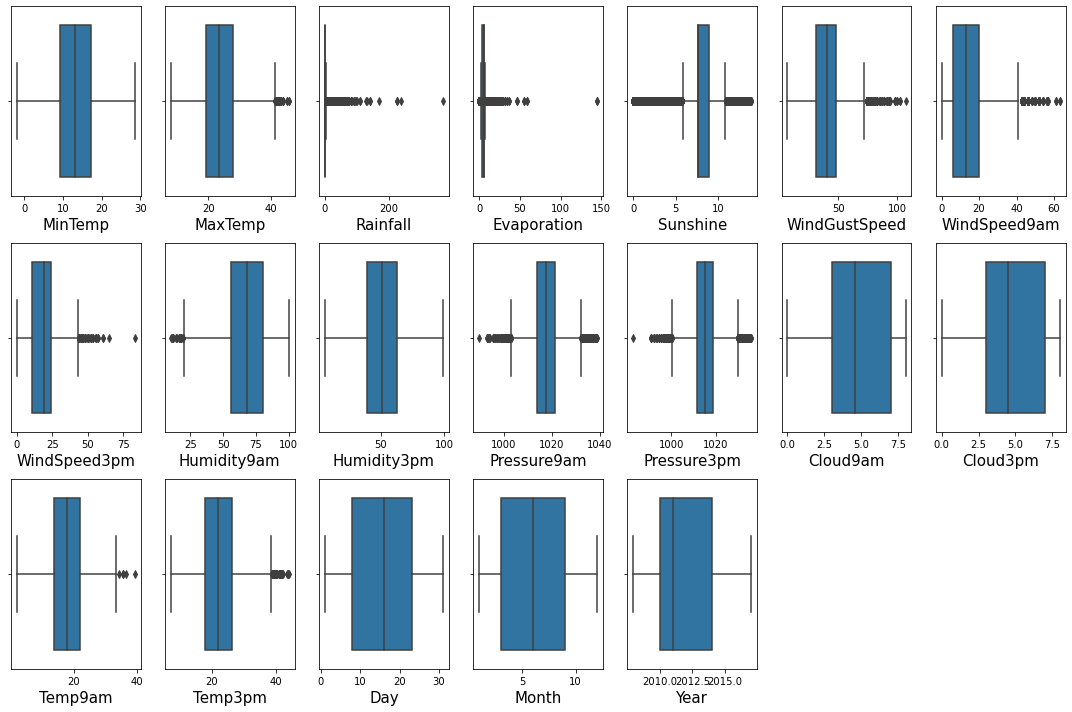

In [33]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(DF[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

### Removing Outliers

In [34]:
feature = DF[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

import scipy as stats
from scipy.stats import zscore
z=np.abs(zscore(feature))

z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1.570089e-01,0.206021,2.305893e-16,1.257472e-15,0.277710,0.607461,0.563297,0.189439,1.584003,1.308665,0.153712,0.108138
1,2.028121e-01,0.264165,2.305893e-16,1.257472e-15,0.277710,0.972321,0.357200,1.420268,1.121880,1.196072,0.100217,0.312348
2,3.009450e-01,0.264165,2.305893e-16,1.257472e-15,0.422897,0.508725,0.769394,1.777981,1.599939,1.051309,0.577390,0.127334
3,6.771214e-01,0.264165,2.305893e-16,1.257472e-15,1.174166,0.281166,0.982428,1.360650,0.006411,0.391836,0.060269,0.682376
4,1.380408e+00,0.167258,2.305893e-16,1.257472e-15,0.059928,0.676112,0.151104,0.845246,1.090010,1.485596,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,7.523137e-02,0.264165,2.305893e-16,1.257472e-15,0.666009,0.083694,0.776331,1.002937,1.109058,0.814518,1.366273,0.007221
8421,2.355231e-01,0.264165,2.305893e-16,1.257472e-15,1.319354,0.083694,0.982428,0.704843,0.933770,0.621501,1.223619,0.345987
8422,4.972110e-01,0.264165,2.305893e-16,1.257472e-15,0.230447,0.478639,0.982428,0.883699,0.535388,0.251553,0.938310,0.615099
8423,5.135665e-01,0.264165,2.305893e-16,1.257472e-15,0.883791,0.083694,1.188525,1.002937,0.280424,0.203299,0.474684,0.598279


In [35]:
New_DF = DF[(z<3).all(axis=1)]
New_DF

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

### Checking Skewness

In [36]:
New_DF.skew().sort_values()

Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Evaporation      0.846181
Rainfall         3.519090
dtype: float64

We can see that features, Sunshine, Rainfall, Evaporation, Windspeed9am, Windgustspeed has skewness.

### Removing skewness using log transformation

In [37]:
New_DF["Sunshine"] = np.log1p(New_DF["Sunshine"])
New_DF["Rainfall"] = np.log1p(New_DF["Rainfall"])
New_DF["Evaporation"] = np.log1p(New_DF["Evaporation"])
New_DF["WindSpeed9am"] = np.log1p(New_DF["WindSpeed9am"])
New_DF["WindGustSpeed"] = np.log1p(New_DF["WindGustSpeed"])

In [38]:
New_DF.skew().sort_values()

Sunshine        -2.460672
WindSpeed9am    -1.186810
Evaporation     -0.993594
WindGustSpeed   -0.526267
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
Rainfall         1.811941
dtype: float64

### Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
New_DF[cat_col] = New_DF[cat_col].apply(LE.fit_transform)
New_DF

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.470004,1.85464,2.1555,13,3.806662,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.000000,1.85464,2.1555,14,3.806662,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.000000,1.85464,2.1555,15,3.850148,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.000000,1.85464,2.1555,4,3.218876,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,0.693147,1.85464,2.1555,13,3.737670,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,1.85464,2.1555,0,3.465736,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.000000,1.85464,2.1555,6,3.135494,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.000000,1.85464,2.1555,3,3.637586,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.000000,1.85464,2.1555,9,3.367296,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


We have converted the categorical columns into numerical columns using label encoding method.

### Checking the corelation

In [40]:
cor = New_DF.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063798,0.013354,0.123801,0.068152,-0.037707,0.263202,-0.041030,-0.031195,...,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.080984,0.355551,0.008673,-0.154935,0.262663,-0.045231,-0.154184,...,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.206494,0.458312,0.316812,-0.237955,0.163935,-0.217160,-0.190417,...,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.013354,0.080984,-0.206494,1.000000,-0.151081,-0.189936,0.116389,0.086445,0.148138,0.103933,...,-0.034828,0.278194,0.240747,-0.076736,-0.215864,0.902769,0.317142,-0.016476,-0.005666,0.002860
Evaporation,0.123801,0.355551,0.458312,-0.151081,1.000000,0.349285,-0.116103,0.154434,-0.096182,-0.039583,...,-0.269095,-0.101440,-0.137281,0.424506,0.446336,-0.166170,-0.087821,0.009767,-0.047647,0.148225
Sunshine,0.068152,0.008673,0.316812,-0.189936,0.349285,1.000000,-0.073069,0.002758,-0.054298,-0.049383,...,-0.035891,-0.438407,-0.460418,0.182254,0.332749,-0.187463,-0.293951,-0.000143,-0.001379,0.115062
WindGustDir,-0.037707,-0.154935,-0.237955,0.116389,-0.116103,-0.073069,1.000000,-0.002519,0.405681,0.507292,...,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.263202,0.262663,0.163935,0.086445,0.154434,0.002758,-0.002519,1.000000,-0.059409,0.086693,...,-0.322502,0.001923,0.053528,0.237165,0.130016,0.075067,0.161878,-0.005867,0.048639,-0.014468
WindDir9am,-0.041030,-0.045231,-0.217160,0.148138,-0.096182,-0.054298,0.405681,-0.059409,1.000000,0.243622,...,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.103933,-0.039583,-0.049383,0.507292,0.086693,0.243622,1.000000,...,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.000714,0.028629,-0.010781


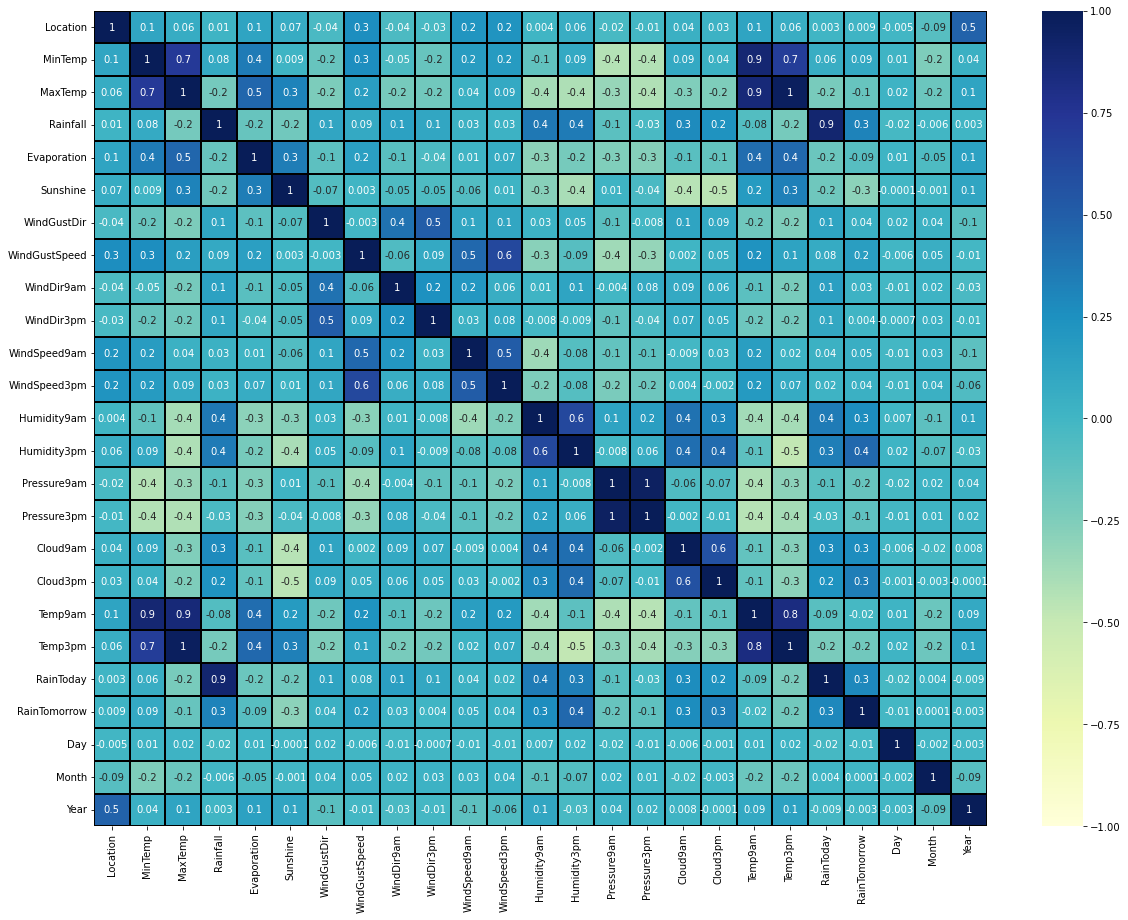

In [41]:
plt.figure(figsize=(20,15))    
sns.heatmap(New_DF.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [42]:
cor['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.445891
Cloud3pm         0.337922
Rainfall         0.317142
RainToday        0.294528
Humidity9am      0.269722
Cloud9am         0.269598
WindGustSpeed    0.161878
MinTemp          0.091021
WindSpeed9am     0.048750
WindGustDir      0.044378
WindSpeed3pm     0.042472
WindDir9am       0.027091
Location         0.009222
WindDir3pm       0.003674
Month            0.000135
Year            -0.003180
Day             -0.012493
Temp9am         -0.021459
Evaporation     -0.087821
Pressure3pm     -0.124953
MaxTemp         -0.149708
Pressure9am     -0.152692
Temp3pm         -0.191706
Sunshine        -0.293951
Name: RainTomorrow, dtype: float64

In [43]:
cor['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.902769
Humidity9am      0.374141
Humidity3pm      0.357797
RainTomorrow     0.317142
Cloud9am         0.278194
Cloud3pm         0.240747
WindDir9am       0.148138
WindGustDir      0.116389
WindDir3pm       0.103933
WindGustSpeed    0.086445
MinTemp          0.080984
WindSpeed9am     0.032173
WindSpeed3pm     0.026797
Location         0.013354
Year             0.002860
Month           -0.005666
Day             -0.016476
Pressure3pm     -0.034828
Temp9am         -0.076736
Pressure9am     -0.108548
Evaporation     -0.151081
Sunshine        -0.189936
MaxTemp         -0.206494
Temp3pm         -0.215864
Name: Rainfall, dtype: float64

### Visualizing the correlation

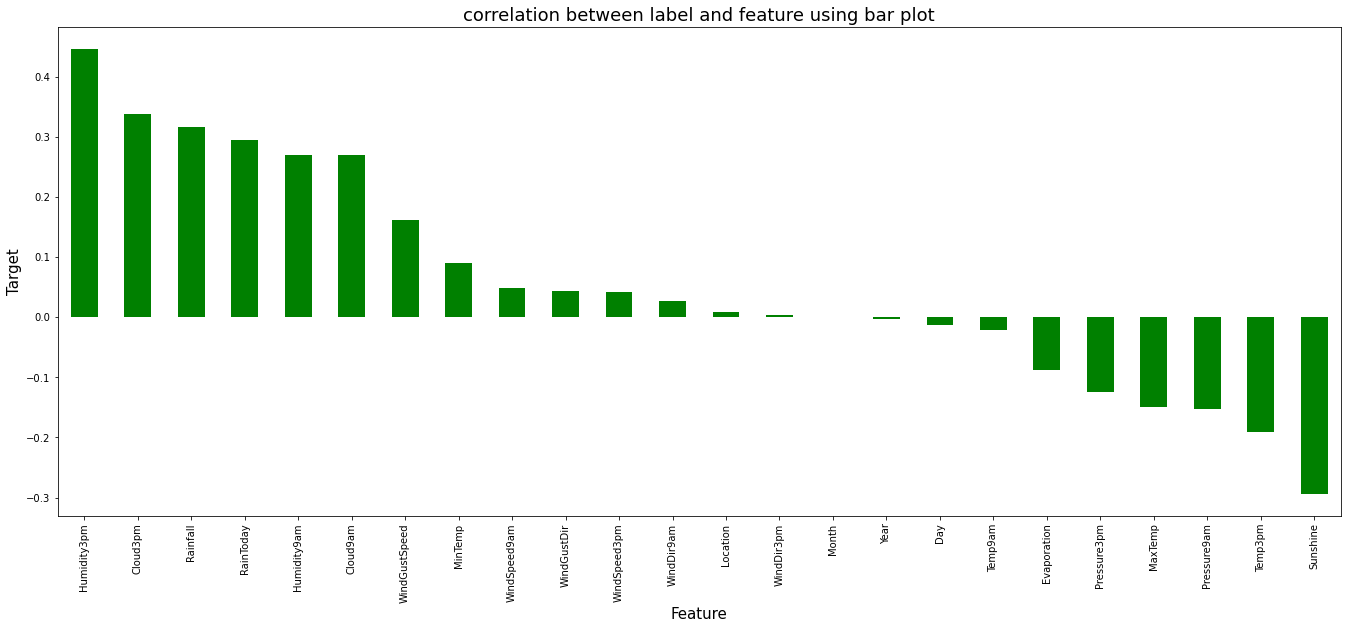

In [44]:
plt.figure(figsize=(23,9))
New_DF.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

### Data Pre-processing

In [45]:
X = New_DF.drop("RainTomorrow", axis=1)
Y = New_DF["RainTomorrow"]

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,-0.001029,0.2832,0.169416,1.229267,0.485042,1.250245,1.400214,...,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.543392,0.2832,0.169416,1.441960,0.485042,-0.277857,1.626597,...,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.543392,0.2832,0.169416,1.654654,0.615247,1.250245,1.626597,...,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.543392,0.2832,0.169416,-0.684977,-1.274926,0.377044,-1.769138,...,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.256468,0.2832,0.169416,1.229267,0.278462,-1.369358,-0.184462,...,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,-0.543392,0.2832,0.169416,-1.535751,-0.535770,0.377044,-1.542755,...,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,-0.543392,0.2832,0.169416,-0.259589,-1.524590,0.377044,-1.089991,...,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,-0.543392,0.2832,0.169416,-0.897670,-0.021211,0.377044,1.400214,...,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,-0.543392,0.2832,0.169416,0.378492,-0.830522,0.595344,-1.089991,...,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,0.942990,-0.123726,2.004134


### Checking VIF

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF Values,Features
0,1.591950,Location
1,8.763864,MinTemp
2,26.351310,MaxTemp
3,5.619158,Rainfall
4,1.505020,Evaporation
5,1.633523,Sunshine
6,1.621681,WindGustDir
7,2.158495,WindGustSpeed
8,1.397334,WindDir9am
9,1.493832,WindDir3pm


We can see that we have high multicolinearity in features: MaxTemp, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

In [48]:
X.drop('Temp3pm',axis=1,inplace=True)

In [49]:
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF Values,Features
0,1.590914,Location
1,8.725374,MinTemp
2,9.618350,MaxTemp
3,5.616245,Rainfall
4,1.503205,Evaporation
5,1.632528,Sunshine
6,1.618586,WindGustDir
7,2.151185,WindGustSpeed
8,1.396733,WindDir9am
9,1.492748,WindDir3pm


In [50]:
X.drop('Pressure9am',axis=1,inplace=True)

In [51]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF values,Features
0,1.590819,Location
1,8.576956,MinTemp
2,9.205668,MaxTemp
3,5.604577,Rainfall
4,1.491358,Evaporation
5,1.632164,Sunshine
6,1.603541,WindGustDir
7,2.132035,WindGustSpeed
8,1.373054,WindDir9am
9,1.426346,WindDir3pm


In [52]:
X.drop('Temp9am',axis=1,inplace=True)

In [53]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF values,Features
0,1.589072,Location
1,4.530225,MinTemp
2,5.347522,MaxTemp
3,5.595027,Rainfall
4,1.485802,Evaporation
5,1.627447,Sunshine
6,1.601592,WindGustDir
7,2.090701,WindGustSpeed
8,1.372795,WindDir9am
9,1.426023,WindDir3pm


Now we can see that we have removed all the multi-colinearity and it dont exist in the dataset.

### Oversampling

In [54]:
Y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

We can see that there is a significant difference in the classes hence lets fix this usin g SMOTE.

In [55]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, Y = SM.fit_resample(X,Y)

In [56]:
Y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

We can see that the oversampling issue has been fixed.

### Finding the best random state

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=i)
    RF = RandomForestClassifier()
    RF.fit(X_train,Y_train)
    predRF = RF.predict(X_test)
    acc = accuracy_score(Y_test,predRF)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print(f'Best Accuracy is {maxAccu} on Random_state {maxRs}')

Best Accuracy is 0.939713436063801 on Random_state 153


In [58]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
Humidity3pm,0.143
Cloud3pm,0.090
Rainfall,0.079
Sunshine,0.063
Humidity9am,0.056
Cloud9am,0.053
WindGustSpeed,0.053
Pressure3pm,0.047
MaxTemp,0.039


### Train Test Split

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=maxRs)

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error

LOR = LogisticRegression()
LOR.fit(X_train,Y_train)

# Prediction
predLOR = LOR.predict(X_test)
print('R2 Score :',r2_score(Y_test,predLOR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test,predLOR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLOR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLOR)))

print("-----------------------------------------------------")
# Accuracy Score
print(accuracy_score(Y_test, predLOR))
print("-----------------------------------------------------")
# Confusion Matrix
print(confusion_matrix(Y_test, predLOR))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predLOR)) 

R2 Score : 0.11219190048201377
Mean Absolute Error(MAE) 0.22195187888618545
Mean Squared Error 0.22195187888618545
Root Mean Squared Error 0.4711176911199424
-----------------------------------------------------
0.7780481211138145
-----------------------------------------------------
[[1477  374]
 [ 447 1401]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1851
           1       0.79      0.76      0.77      1848

    accuracy                           0.78      3699
   macro avg       0.78      0.78      0.78      3699
weighted avg       0.78      0.78      0.78      3699



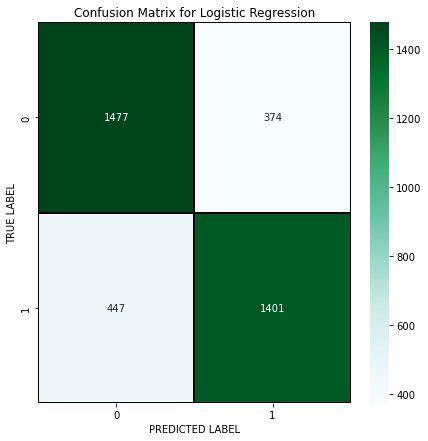

In [61]:
cm = confusion_matrix(Y_test,predLOR)

x_axis_labels = ['0','1']
y_axis_labels = ['0','1']

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot = True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='BuGn',xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix for Logistic Regression');

### Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Checking accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

# [Prediction]
predDTC = DTC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predDTC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predDTC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predDTC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predDTC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predDTC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predDTC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predDTC)) 

R2 Score: 0.47012671283335783
Mean Absolute Error 0.1324682346580157
Mean Squared Error 0.1324682346580157
Root Mean Squared Error 0.3639618587956926
-----------------------------------------------------
Accuracy Score:  0.8675317653419843
-----------------------------------------------------
Confusion Matrix:
 [[1587  264]
 [ 226 1622]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1851
           1       0.86      0.88      0.87      1848

    accuracy                           0.87      3699
   macro avg       0.87      0.87      0.87      3699
weighted avg       0.87      0.87      0.87      3699



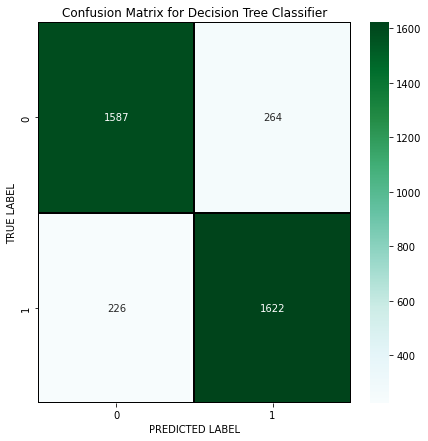

In [63]:
cm = confusion_matrix(Y_test,predDTC)

x_axis_labels = ['0','1']
y_axis_labels = ['0','1']

f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=.2, linecolor='black', fmt= '.0f',ax=ax, cmap='BuGn', xticklabels= x_axis_labels, yticklabels= y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

# [Prediction]
predRFC = RFC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predRFC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predRFC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predRFC))

R2 Score: 0.7502025931928686
Mean Absolute Error 0.062449310624493104
Mean Squared Error 0.062449310624493104
Root Mean Squared Error 0.24989860068534417
-----------------------------------------------------
Accuracy Score:  0.9375506893755069
-----------------------------------------------------
Confusion Matrix:
 [[1723  128]
 [ 103 1745]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1851
           1       0.93      0.94      0.94      1848

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699



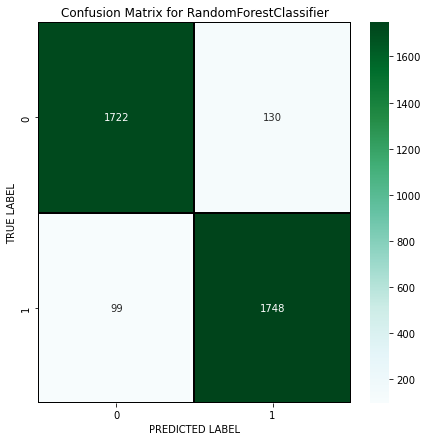

In [73]:
cm = confusion_matrix(Y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

### KNeighborsClassifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)

# [Prediction]
predKNN = KNN.predict(X_test)
print('R2 Score:',r2_score(Y_test,predKNN))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predKNN))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predKNN))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predKNN)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predKNN))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predKNN))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predKNN))

R2 Score: 0.4528247279462837
Mean Absolute Error 0.13679372803460393
Mean Squared Error 0.13679372803460393
Root Mean Squared Error 0.36985636135478855
-----------------------------------------------------
Accuracy Score:  0.863206271965396
-----------------------------------------------------
Confusion Matrix:
 [[1418  433]
 [  73 1775]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1851
           1       0.80      0.96      0.88      1848

    accuracy                           0.86      3699
   macro avg       0.88      0.86      0.86      3699
weighted avg       0.88      0.86      0.86      3699



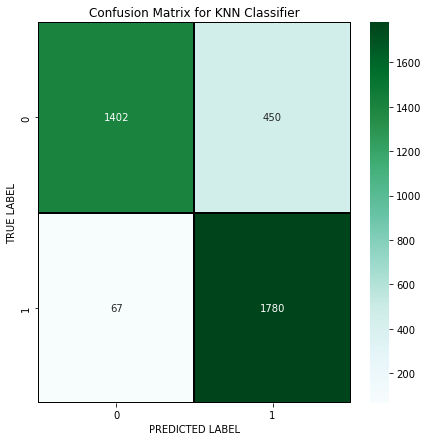

In [75]:
cm = confusion_matrix(Y_test,predKNN)

x_axis = ['0','1']
y_axis = ['0','1']

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot= True, linewidths=.2, linecolor='black', fmt= '.0f',ax=ax, cmap='BuGn', xticklabels= x_axis, yticklabels= y_axis)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

### AdaBoost Classifier

In [76]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train,Y_train)

# [Prediction]
predADA = ADA.predict(X_test)
print('R2 Score:',r2_score(Y_test,predADA))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predADA))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predADA))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predADA)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predADA))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predADA))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predADA))

R2 Score: 0.28304816286056056
Mean Absolute Error 0.1792376317923763
Mean Squared Error 0.1792376317923763
Root Mean Squared Error 0.423364655813846
-----------------------------------------------------
Accuracy Score:  0.8207623682076237
-----------------------------------------------------
Confusion Matrix:
 [[1512  340]
 [ 323 1524]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1852
           1       0.82      0.83      0.82      1847

    accuracy                           0.82      3699
   macro avg       0.82      0.82      0.82      3699
weighted avg       0.82      0.82      0.82      3699



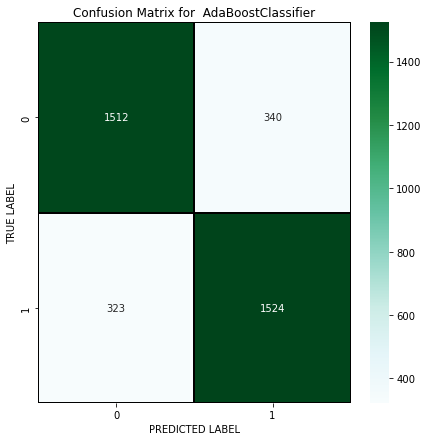

In [77]:
cm = confusion_matrix(Y_test,predADA)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoostClassifier')
plt.show()

### Gradient Boosting Classifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train,Y_train)

# [Prediction]
predGBC = GBC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGBC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGBC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGBC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGBC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predGBC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predGBC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predGBC))

R2 Score: 0.47661434513500955
Mean Absolute Error 0.13084617464179507
Mean Squared Error 0.13084617464179507
Root Mean Squared Error 0.36172665735579274
-----------------------------------------------------
Accuracy Score:  0.869153825358205
-----------------------------------------------------
Confusion Matrix:
 [[1608  244]
 [ 240 1607]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1852
           1       0.87      0.87      0.87      1847

    accuracy                           0.87      3699
   macro avg       0.87      0.87      0.87      3699
weighted avg       0.87      0.87      0.87      3699



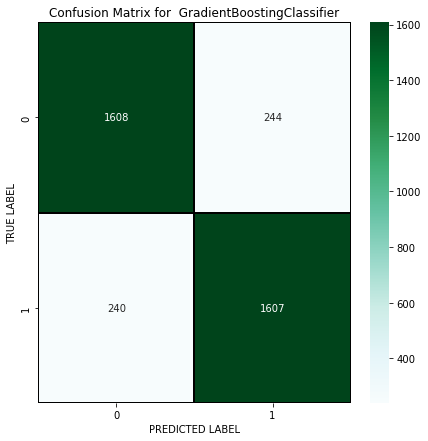

In [79]:
cm = confusion_matrix(Y_test,predGBC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  GradientBoostingClassifier')
plt.show()

### Naive Bias Classifier

In [80]:
from sklearn.naive_bayes import GaussianNB
GNB = GradientBoostingClassifier()
GNB.fit(X_train,Y_train)

# [Prediction]
predGNB = GNB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGNB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGNB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGNB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGNB)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predGNB))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predGNB))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predGNB))

R2 Score: 0.47661434513500955
Mean Absolute Error 0.13084617464179507
Mean Squared Error 0.13084617464179507
Root Mean Squared Error 0.36172665735579274
-----------------------------------------------------
Accuracy Score:  0.869153825358205
-----------------------------------------------------
Confusion Matrix:
 [[1608  244]
 [ 240 1607]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1852
           1       0.87      0.87      0.87      1847

    accuracy                           0.87      3699
   macro avg       0.87      0.87      0.87      3699
weighted avg       0.87      0.87      0.87      3699



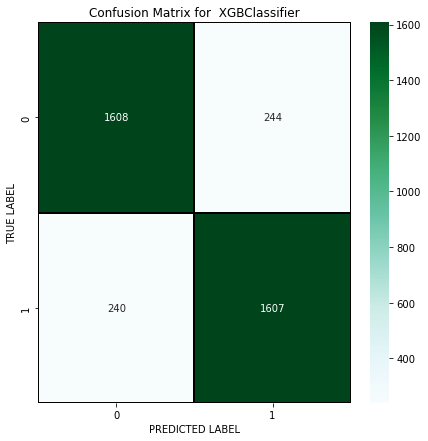

In [81]:
cm = confusion_matrix(Y_test,predGNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGBClassifier')
plt.show()

### XGBClassifier

In [83]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)

# [Prediction]
predXGB = XGB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predXGB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predXGB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predXGB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predXGB)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predXGB))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predXGB))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predXGB))

R2 Score: 0.7307375453277218
Mean Absolute Error 0.06731549067315491
Mean Squared Error 0.06731549067315491
Root Mean Squared Error 0.2594522897820617
-----------------------------------------------------
Accuracy Score:  0.9326845093268451
-----------------------------------------------------
Confusion Matrix:
 [[1739  113]
 [ 136 1711]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1852
           1       0.94      0.93      0.93      1847

    accuracy                           0.93      3699
   macro avg       0.93      0.93      0.93      3699
weighted avg       0.93      0.93      0.93      3699



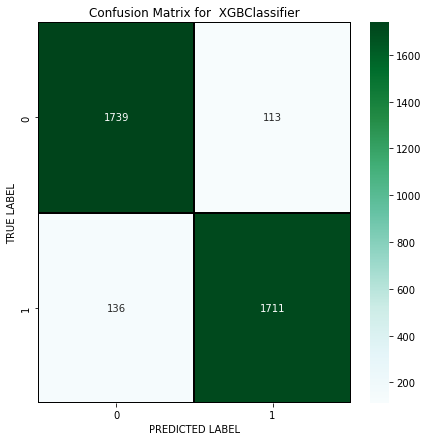

In [84]:
cm = confusion_matrix(Y_test,predXGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGBClassifier')
plt.show()

### Support Vector Machine classifier

In [85]:
from sklearn.svm import SVC

# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train,Y_train)

# [Prediction]
predsvc = svc.predict(X_test)
print('R2 Score:',r2_score(Y_test,predsvc))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predsvc))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predsvc))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predsvc)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predsvc))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predsvc))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predsvc))

R2 Score: 0.41497595189677716
Mean Absolute Error 0.1462557447958908
Mean Squared Error 0.1462557447958908
Root Mean Squared Error 0.3824339744268163
-----------------------------------------------------
Accuracy Score:  0.8537442552041092
-----------------------------------------------------
Confusion Matrix:
 [[1513  339]
 [ 202 1645]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1852
           1       0.83      0.89      0.86      1847

    accuracy                           0.85      3699
   macro avg       0.86      0.85      0.85      3699
weighted avg       0.86      0.85      0.85      3699



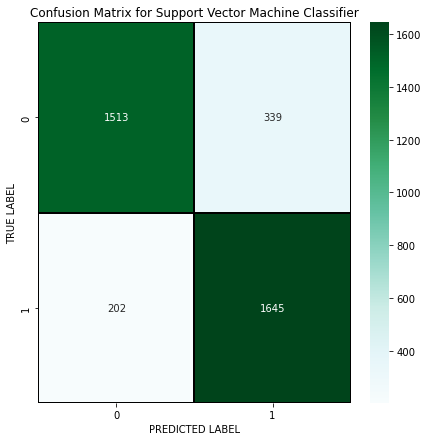

In [86]:
cm = confusion_matrix(Y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### Extra Trees Classifier

In [87]:
from sklearn.ensemble import ExtraTreesClassifier

# Checking accuracy for Support Vector Machine Classifier
ETC = ExtraTreesClassifier()
ETC.fit(X_train,Y_train)

# [Prediction]
predETC = ETC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predETC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predETC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predETC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predETC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predETC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predETC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predETC))

R2 Score: 0.7804808100462953
Mean Absolute Error 0.05487969721546364
Mean Squared Error 0.05487969721546364
Root Mean Squared Error 0.23426416118447063
-----------------------------------------------------
Accuracy Score:  0.9451203027845364
-----------------------------------------------------
Confusion Matrix:
 [[1720  132]
 [  71 1776]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1852
           1       0.93      0.96      0.95      1847

    accuracy                           0.95      3699
   macro avg       0.95      0.95      0.95      3699
weighted avg       0.95      0.95      0.95      3699



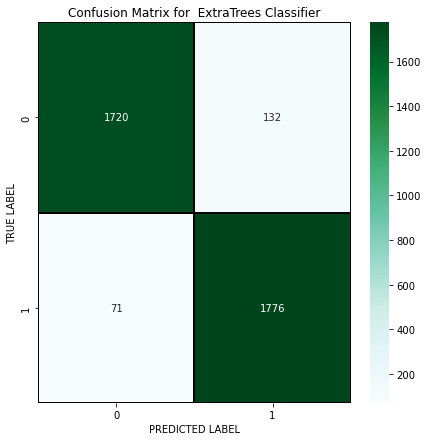

In [88]:
cm = confusion_matrix(Y_test,predETC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

### Cross Validation Score

In [89]:
from sklearn.model_selection import cross_val_score

#cv score for Logistic Regression
print('Logistic Regression',cross_val_score(LOR,X,Y,cv=5).mean())

# cv score for Decision Tree Classifier
print('Decision Tree Classifier',cross_val_score(DTC,X,Y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier',cross_val_score(RFC,X,Y,cv=5).mean())

# cv score for KNeighbors Classifier
print('KNeighbors Classifier',cross_val_score(KNN,X,Y,cv=5).mean())

# cv score for Support Vector  Classifier
print('Support Vector  Classifier',cross_val_score(svc,X,Y,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier',cross_val_score(ETC,X,Y,cv=5).mean())

# cv score for Naive Bias Classifier
print('Naive Bias Classifier:',cross_val_score(GNB,X,Y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(ADA,X,Y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier',cross_val_score(XGB,X,Y,cv=5).mean())

Logistic Regression 0.7158150851581508
Decision Tree Classifier 0.7291159772911598
Random Forest Classifier 0.7935928629359286
KNeighbors Classifier 0.7364152473641524
Support Vector  Classifier 0.7497161394971614
Extra Trees Classifier 0.8137064071370641
Naive Bias Classifier: 0.6738848337388483
AdaBoosting Classifier: 0.670478507704785
Gradient Boosting Classifier 0.7158961881589618


### Hyper Parameter Tuning

In [90]:
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [91]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [92]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 10}

In [94]:
Rainfall_Tomorrow=ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=200, n_jobs=-2, random_state=1000)
Rainfall_Tomorrow.fit(X_train, Y_train)
pred = Rainfall_Tomorrow.predict(X_test)
acc=accuracy_score(Y_test,pred)
print('After HyperParameter tuning we have received an accuracy score of',acc*100)

After HyperParameter tuning we have received an accuracy score of 94.3227899432279


### Plotting ROC and compare AUC for the final model

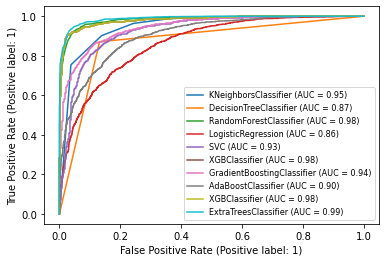

In [95]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(KNN,X_test,Y_test)
plot_roc_curve(DTC, X_test, Y_test, ax=disp.ax_)     
plot_roc_curve(RFC, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(LOR, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(XGB, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(GNB, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(ADA, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(XGB, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(ETC, X_test, Y_test, ax=disp.ax_)

plt.legend(prop={'size':8}, loc='lower right')
plt.show()

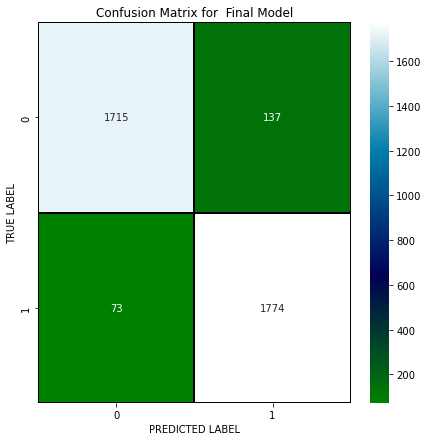

In [96]:
cm = confusion_matrix(Y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

### Saving the Model

In [97]:
import joblib
joblib.dump(Rainfall_Tomorrow,"Prediction_of_Rainfall_Tomorrow.pkl")

['Prediction_of_Rainfall_Tomorrow.pkl']

### Predicting the saved model

In [98]:
# Loading the saved model
model=joblib.load("Prediction_of_Rainfall_Tomorrow.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1, 1, 1, ..., 0, 0, 0])

In [100]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1,0
1,1,1
2,1,1
3,0,0
4,1,0
...,...,...
3694,1,1
3695,1,1
3696,0,0
3697,0,0


We can see that the Actual Value and Predicted Value is almost same.

## Prediction for Rainfall

### Data Preprocessing

In [101]:
New_DF.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.470004,1.85464,2.1555,13,3.806662,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.000000,1.85464,2.1555,14,3.806662,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.000000,1.85464,2.1555,15,3.850148,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.000000,1.85464,2.1555,4,3.218876,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,0.693147,1.85464,2.1555,13,3.737670,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [102]:
X = New_DF.drop('Rainfall',axis=1)
Y = New_DF['Rainfall']

### Standard Scalarization

In [103]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.2832,0.169416,1.229267,0.485042,1.250245,1.400214,0.742680,...,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,0.2832,0.169416,1.441960,0.485042,-0.277857,1.626597,-0.771299,...,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,0.2832,0.169416,1.654654,0.615247,1.250245,1.626597,0.691207,...,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,0.2832,0.169416,-0.684977,-1.274926,0.377044,-1.769138,0.152299,...,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.2832,0.169416,1.229267,0.278462,-1.369358,-0.184462,-0.275457,...,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,0.2832,0.169416,-1.535751,-0.535770,0.377044,-1.542755,0.314924,...,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,-0.543635,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,0.2832,0.169416,-0.259589,-1.524590,0.377044,-1.089991,0.314924,...,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,-0.543635,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,0.2832,0.169416,-0.897670,-0.021211,0.377044,1.400214,-0.040046,...,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,-0.543635,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,0.2832,0.169416,0.378492,-0.830522,0.595344,-1.089991,0.314924,...,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,-0.543635,0.942990,-0.123726,2.004134


### Checking VIF

In [104]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF values,Features
0,1.602216,Location
1,8.776052,MinTemp
2,26.340651,MaxTemp
3,1.505386,Evaporation
4,1.647674,Sunshine
5,1.623987,WindGustDir
6,2.216485,WindGustSpeed
7,1.396968,WindDir9am
8,1.495284,WindDir3pm
9,1.814908,WindSpeed9am


We see multicolinearity exist in MaxTemp, Temp9am, Temp3pm, Pressure9am,Pressure3pm.

In [105]:
X.drop('MaxTemp',axis=1,inplace=True)

In [106]:
vif =pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF values,Features
0,1.600105,Location
1,8.762938,MinTemp
2,1.502767,Evaporation
3,1.641266,Sunshine
4,1.623369,WindGustDir
5,2.206998,WindGustSpeed
6,1.394553,WindDir9am
7,1.494076,WindDir3pm
8,1.814058,WindSpeed9am
9,1.964154,WindSpeed3pm


In [107]:
X.drop("Pressure9am",axis=1,inplace=True)

In [108]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.600020,Location
1,8.597799,MinTemp
2,1.489207,Evaporation
3,1.640480,Sunshine
4,1.610549,WindGustDir
5,2.187804,WindGustSpeed
6,1.372896,WindDir9am
7,1.432629,WindDir3pm
8,1.804904,WindSpeed9am
9,1.951201,WindSpeed3pm


In [109]:
X.drop('Temp9am',axis=1,inplace=True)

In [111]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

# Let's check the values
vif

,VIF values,Features
0,1.599476,Location
1,4.956734,MinTemp
2,1.484270,Evaporation
3,1.633260,Sunshine
4,1.605885,WindGustDir
5,2.166456,WindGustSpeed
6,1.372360,WindDir9am
7,1.432534,WindDir3pm
8,1.794714,WindSpeed9am
9,1.910324,WindSpeed3pm


Now we can see that there is no vif values more then 10, hence multicolinearity issue has been resolved.

### Finding the best random state

In [114]:
from sklearn.ensemble import RandomForestRegressor

maxAccu = 0
maxRs = 0

for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=i)
    RFB = RandomForestRegressor()
    RFB.fit(X_train,Y_train)
    predRFB = RFB.predict(X_test)
    acc = r2_score(Y_test,predRFB)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print(f'Best Accuracy is {maxAccu} on Random_state {maxRs}')

Best Accuracy is 0.889339467341906 on Random_state 195


In [115]:
# Lets ckeck the feature importance using Random Forest Regressor

rfb = RandomForestRegressor()
rfb.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rfb.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
RainToday,0.808
Humidity9am,0.020
MinTemp,0.018
Pressure3pm,0.014
WindSpeed9am,0.013
Day,0.013
Temp3pm,0.013
Humidity3pm,0.012
WindGustSpeed,0.010


With the help of Random Forest Regressor we are able to list down the importance or priority given to a feature as per it's involvement or weightage in predicting our label.

### Train Test Split

In [117]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=maxRs)

### Linear Regression

In [119]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

LR=LinearRegression()
LR.fit(X_train,Y_train)
# [Prediction]
predLR = LR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predLR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predLR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLR)))

R2 Score: 0.8309765472832031
Mean Absolute Error 0.20321224976506297
Mean Squared Error 0.13040702726583708
Root Mean Squared Error 0.36111913168071985


### Linear Regression with Ridge

In [120]:
from sklearn.model_selection import GridSearchCV
paramsRidge ={'alpha':[0.01,0.1,1.0,10.26],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramsRidge)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 0.1, 'solver': 'saga'}


In [121]:
ridge = Ridge(alpha = 10.26,solver = 'sag')
ridge.fit(X_train,Y_train)
ridge.score(X_train,Y_train)
pred_ridge = ridge.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_ridge))
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_ridge))
print('Mean Squared Error',mean_squared_error(Y_test,pred_ridge))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,pred_ridge)))

R2 Score: 0.830900490096002
Mean Absolute Error 0.2035003210311798
Mean Squared Error 0.13046570783072722
Root Mean Squared Error 0.36120037075109324


### Linear Regression With Lasso

In [122]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso = Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [123]:
lasso = Lasso(alpha=1,random_state=0)
lasso.fit(X_train,Y_train)
lasso.score(X_train,Y_train)
pred_lasso = lasso.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_lasso))
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_lasso))
print('Mean Squared Error',mean_squared_error(Y_test,pred_lasso))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,pred_lasso)))

R2 Score: -9.233051502910428e-05
Mean Absolute Error 0.6706601598157164
Mean Squared Error 0.7716033823563436
Root Mean Squared Error 0.8784095755149437


### Random Forest Regressor

In [125]:
RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)
# [Prediction]
predRFR = RFR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFR)))

R2 Score: 0.8851884953745035
Mean Absolute Error 0.1523513881588837
Mean Squared Error 0.08858076659465276
Root Mean Squared Error 0.2976252116247089


### GradientBoostingRegressor

In [126]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X_train,Y_train)

# [Prediction]
predGB = GB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGB)))

R2 Score: 0.8521323590728755
Mean Absolute Error 0.18214017025618578
Mean Squared Error 0.11408463838700333
Root Mean Squared Error 0.33776417570104045


### Bagging Regressor

In [127]:
from sklearn.ensemble import BaggingRegressor
BR = BaggingRegressor()
BR.fit(X_train,Y_train)

# [Prediction]
predBR = BR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predBR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predBR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predBR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predBR)))

R2 Score: 0.8715116836319172
Mean Absolute Error 0.15827766613076166
Mean Squared Error 0.0991328665142631
Root Mean Squared Error 0.31485372240814163


### Decision Tree Regressor

In [128]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,Y_train)

# [Prediction]
predDTR = DTR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predDTR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predDTR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predDTR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predDTR)))

R2 Score: 0.7653986643543471
Mean Absolute Error 0.17549853136838656
Mean Squared Error 0.18100247203803682
Root Mean Squared Error 0.42544385297949344


### ExtraTrees Regressor

In [130]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(X_train,Y_train)

# [Prediction]
predETR = ETR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predETR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predETR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predETR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predETR)))

R2 Score: 0.8908280872892298
Mean Absolute Error 0.1331252990840541
Mean Squared Error 0.08422964013988694
Root Mean Squared Error 0.29022343141084755


### XGB Regressor

In [132]:
from xgboost import XGBRegressor as xgb

xgb=xgb(verbosity=0)
xgb.fit(X_train,Y_train)

# prediction
predxgb=xgb.predict(X_test)
print('R2_Score:',r2_score(Y_test,predxgb))

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test, predxgb))

# Mean Squared Error(MSE)
print('Mean Squared Error(MAE)',mean_squared_error(Y_test, predxgb))

# Root Mean Squared Error (RMSE)
print("Root Mean Squared Error (RMSE)",np.sqrt(mean_squared_error(Y_test, predxgb)))

R2_Score: 0.8804005312284404
Mean Absolute Error(MAE) 0.15395606335104184
Mean Squared Error(MAE) 0.0922748348491314
Root Mean Squared Error (RMSE) 0.30376773174438954


### KNeighborsRegressor

In [133]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

# [Prediction]
predKNN = KNN.predict(X_test)
print('R2 Score:',r2_score(Y_test,predKNN))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predKNN))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predKNN))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predKNN)))

R2 Score: 0.799181228338438
Mean Absolute Error 0.19734675075425992
Mean Squared Error 0.15493813793663422
Root Mean Squared Error 0.3936218209609755


### Cross-Validation

In [135]:
from sklearn.model_selection import cross_val_score

# Checking cv score for Linear Regression
print('Linear Regression -->',cross_val_score(LR,X,Y,cv=5).mean())

# Checking cv score for Random Forest Regressor
print('Random Forest Regressor -->',cross_val_score(RFR,X,Y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print('GradientBoostingRegressor -->',cross_val_score(GB,X,Y,cv=5).mean())

#Checking the cv score for BaggingRegressor
print('BaggingRegressor -->',cross_val_score(BR,X,Y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print('Decision Tree Regressor -->',cross_val_score(DTR,X,Y,cv=5).mean())

# Checking cv score for ExtraTrees Regressor
print('ExtraTrees Regressor -->',cross_val_score(ETR,X,Y,cv=5).mean())

# Checking cv score for XGBRegressor
print('XGBRegressor:',cross_val_score(xgb,X,Y,cv=5).mean())

Linear Regression --> 0.8194197773714225
Random Forest Regressor --> 0.85458919560973
GradientBoostingRegressor --> 0.8290116135953
BaggingRegressor --> 0.8381370904241987
Decision Tree Regressor --> 0.7189259279045759
ExtraTrees Regressor --> 0.8631485542935051
XGBRegressor: 0.8327763987018008


Based on the model score and the cross val score we have found that ExtraTree Regressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

In [136]:
parameters = {'n_estimators' : [50,100,200],
              'criterion' :['mse', 'mae'],
              'max_depth' : [4, 6, 8]}

In [137]:
GCV = GridSearchCV(ETR,parameters,cv=5)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [4, 6, 8],
                         'n_estimators': [50, 100, 200]})

In [138]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 8, 'n_estimators': 100}

In [139]:
Rainfall = ExtraTreesRegressor(criterion='mse', max_depth=8, n_estimators=100)
Rainfall.fit(X_train, Y_train)
pred = Rainfall.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('MAE:',metrics.mean_absolute_error(Y_test, pred))
print('MSE:',metrics.mean_squared_error(Y_test, pred))

R2_Score: 85.9139074275807
RMSE value: 0.329664575542021
MAE: 0.17791139407916742
MSE: 0.10867873236730086


### Saving the model

In [140]:
import joblib
joblib.dump(Rainfall,"Prediction_of_Rainfall.pkl")

['Prediction_of_Rainfall.pkl']

### Predicting the saved model

In [142]:
# Loading the saved model
model=joblib.load("Prediction_of_Rainfall.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([0.03613246, 0.00512616, 1.57329306, ..., 0.13975338, 0.08011483,
       0.06020311])

In [143]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0.036132,0.000000
1,0.005126,0.000000
2,1.573293,3.063391
3,0.051292,0.000000
4,0.111327,0.000000
...,...,...
2392,1.501257,0.955511
2393,0.025546,0.000000
2394,0.139753,0.182322
2395,0.080115,0.000000


## Model Building and Prediction:
### Final Score for Rainfall Tomorrow is : 94%
### Final Score for Rainfall is: 86%